 # Problem 3

# 3a) Linear Programming Formulation 

# Flow Diagram representing the Cash Flow(Cash needs and Cash Surpluses), Borrowing oppurtunities(2-year loan or 6 months loan or quarterly loan) ,investment of surplus amount for the 8 quarters and final wealth at the beginning of Q9

<img src="DS211_mp2_P3_1.png">


# The below Assumptions are made in problem formulatiuon:

1. For each type of loan,the principal amount of the loan along with the quarterly basis interest charged is paid together at once.



2. The cash needs is kept aside at the beginning of a quarter itself.(Note: Cash need is substracted before 1.5 times factor is considered).



3. The cash surplus comes at the end of the quarter so we cannot invest that amount at 0.5% rate in the same  quarter.(Note:  Cash Surplus is added after 1.5 times factor considered)




# The Objective function is :

$min \; c^T * x$

subject to

$ 1. \; 1.005 * (x1 + x2 + x3 - 100) = 1.025 * x3 + x4 $  
$ 2. \; 1.005 * (x4 + x5 + x6 - 500) = x7 + 1.025 * x6 + 1.036 * x2 $  
$ 3. \; 1.005 * (x7 + x8 +x9 - 100) = x10 + 1.025 * x9 + 1.036 * x5 $  
$ 4. \; 1.005 * x10 + 600 = x11 + 1.036 * x8 $  
$ 5. \; 1.005 * (1.005 * x11 + 500 + x12 + x13 -200) = x14 + 1.025 * x13 $  
$ 6. \; 1.005 * (x14 + x15 + x16 -600) = 1.025 * x16 + 1.036 * x12 + x17 $  
$ 7. \; 1.005 * x17 + 900 = 1.08 * x1 + 1.036 * x15 + x18 $  
$ 8. \; and \;  x_i >=0  for (1<=i<=18)$  

This corresponds to the standard form:
$min \; c^T * x$ subject to $A * x = b$ , $x>=0$

# Explanation of the above equations : 
1.The inequalities are transformed into equalities by introducing slack variables.

2.The main idea behind the constraints is that the startup should have enough money to meet the cash needs and also it should be able to pay back any loan with full interest applied.

3.But the later constraint is already taking care of the former constarint mentioned in point 2.Hence, we need to consider only the inequalities after paying back any loans in each quarter.

4.The amount left after paying back the loan must be non-negative.And also the loans taken must be non-negative.So, all the variables present are non-negative.

In [1]:
import numpy as np

arr = np.zeros((7, 18))
arr[0][0] = 1.005
arr[0][1] = 1.005
arr[0][2] = -.02
arr[0][3] = -1
arr[1][1] = -1.036
arr[1][3] = 1.005
arr[1][4] = 1.005
arr[1][5] = -.02
arr[1][6] = -1
arr[2][4] = -1.036
arr[2][6] = 1.005
arr[2][7] = 1.005
arr[2][8] = -.02
arr[2][9] = -1
arr[3][7] = -1.036
arr[3][9] = 1.005
arr[3][10] = -1
arr[4][10] = 1.010025
arr[4][11] = 1.005
arr[4][12] = -.02
arr[4][13] = -1
arr[5][11] = -1.036
arr[5][13] = 1.005
arr[5][14]= 1.005
arr[5][15]= -.02
arr[5][16] = -1
arr[6][0] = -1.08
arr[6][14] = -1.036
arr[6][16] = 1.005
arr[6][17] = -1  
print("The A Matrix is:\n",arr) 
b = np.array([100.5,502.5,100.5,-600,-301.5,603,-900])
print("The b vector is:\n",b)
c = np.zeros(18)
c[17] = -1
print("The c vector is:\n",c)

The A Matrix is:
 [[ 1.005     1.005    -0.02     -1.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.       -1.036     0.        1.005     1.005    -0.02     -1.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.       -1.036     0.        1.005
   1.005    -0.02     -1.        0.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        0.
  -1.036     0.        1.005    -1.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        1.010025  1.005    -0.02     -1.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.   

# 3b) Revised Simplex Algorithm -- Two Phase Approach

# Note :
Two phase Revised Simplex Algorithm is used in this problem as the initial point estimate is not trivial in this problem.(Reason: If we simply set all the main variables to zero then some of the slack variables are getting negative which will violate the non-negativity constraint of all variables).

So by introducing some more extra variables in the first phase of the problem, a Initial Guess is found.
And then the second phase is used to actually find the optimal point using that initial guess.

# Phase I -- To find a feasible point

# Now the new objective function for phase 1 is:
$min \; e^T * z$ subject to $A * x + E * z = b$ , $(x,z)>=0$
where $ z $ belongs to $ R^{m} $ , $ e =1,1,....,1^{T} $  
and  
E becomes a diagonal matrix whose diagonal elements are $E_{jj} = +1$ if $b_j	\geqslant 0, \;  E_{jj} = -1$ if $b_{j}	< 0 $.  
Then the point (x,z) defined by $x=0$ , and $z_{j} = |b_{j}| \; for \; j=1,2,...m$
  
    
Now it is seen that the Phase - I has an optimal objective value of zero if and only if the original problem is feasible and it becomes a initial feasible point for Phase II of the problem.

In [2]:
sign_b = (b > 0).astype(np.int)
for ind,val in enumerate(sign_b):
    if(val==0):
        sign_b[ind] = -1
        
#print(sign_b)

E_arr = np.diag(sign_b)
print("The diagonal Matrix because of introduction of artificial variables:\n",E_arr)

The diagonal Matrix because of introduction of artificial variables:
 [[ 1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 -1]]


In [3]:
arr_mod = np.concatenate((arr,E_arr),1)
print("The modified A Matrix for Phase 1 is:\n",arr_mod) 

The modified A Matrix for Phase 1 is:
 [[ 1.005     1.005    -0.02     -1.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        1.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.       -1.036     0.        1.005     1.005    -0.02     -1.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        1.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.       -1.036     0.        1.005
   1.005    -0.02     -1.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        1.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        0.
  -1.036     0.        1.005    -1.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
  -1.        0.        0.        0.  

In [4]:
Basis = [18,19,20,21,22,23,24] #The extra artificial variables introduced are in Basis set as they are non-zero
NonBasis = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17] # All the actual 18 variables are set to zero

In [5]:
c_vect = np.zeros(len(NonBasis))
e_vect = np.concatenate((c_vect,np.ones(b.size)),axis =None)

print("The e vector is:",e_vect)

The e vector is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1.]


In [6]:
import time
import sys

start= time.time()

for i in range(100):
    print("\n")
    print("Iteration Number:",i+1,"starts here.")
    

    
    B = arr_mod[:,Basis]
    N = arr_mod[:,NonBasis]
    print("B matrix is:",B)
    print("N matrix is:",N)
    
    x_b = np.matmul(np.linalg.inv(B),b)
    print("x_b is:",x_b)
    print("\n")
    
    print("Updated variables and function value at start of this iteration:")
    x_out = np.zeros(len(Basis)+len(NonBasis))
    l=0
    for t in Basis:
        x_out[t] = x_b[l]
        l=l+1
    print("The values of variables are:",x_out)
    
    z_vect = x_out[x_out.size-b.size:x_out.size]
    print("The values of extra z variables are:",z_vect)
    
    print("Minimum function Value is:",e_vect.dot(x_out))
    
    x_n = 0
    print(x_n)
    
    c_b = e_vect[Basis]
    print("c_b is:",c_b)
    
    c_n = e_vect[NonBasis]
    print("c_n is:",c_n)
    
    lmbda = np.matmul(np.linalg.inv(B.T),c_b)
    print("lmbda is:",lmbda)
    
    s_n = c_n - np.dot(N.T,lmbda)
    print("s_n is:",s_n)
    
    if(((s_n >= 0).sum() == s_n.size).astype(np.int) == 1):
        print("\n\n\nOptimal Point Found!!!\n\n\n")
        print("Results are as below:")
        x_out = np.zeros(len(Basis)+len(NonBasis))
        l=0
        for t in Basis:
            x_out[t] = x_b[l]
            l=l+1
        print("The values of variables are:",x_out)
        print("Minimum function Value is:",e_vect.dot(x_out))
        break
    else:
        print("continue")
        
    q = NonBasis[np.argmin(s_n)]
    print("NonBasis to Basis Index ==> ",q)
    
    A_q = arr_mod[:,q]
    print("A_q is:",A_q)
    
    d = np.matmul(np.linalg.inv(B),A_q)
    print("d vector is:",d)
    
    if((d > 0).sum() .astype(np.int) == 0):
        print("\n\n\nProblem is Unbounded!!!\n\n\n")
        break
    else:
        print("continue")
    index = -1  
    
    min_val = sys.maxsize
    print("Debug Min Val:",min_val)
    for z in range(d.size):
        if(d[z]>0):
            if(np.double(x_b[z])/np.double(d[z])<=min_val):
                min_val = np.double(x_b[z])/np.double(d[z])
                print("Debug:",min_val)
                index = z;
          
    print("Index:",index)
    p = Basis[index]
    print("Basis to NonBasis Index ==> ",p)

    print("\n")
    NewBasis = np.setdiff1d(Basis,p)
    NewBasis = np.sort(np.append(NewBasis,[q]))
    print("Basis set is:",NewBasis)
    
    NewNonBasis = np.setdiff1d(NonBasis,q)
    NewNonBasis = np.sort(np.append(NewNonBasis,[p]))
    print("Non-Basis set is:",NewNonBasis)
    
    Basis = NewBasis
    NonBasis = NewNonBasis
    i=i+1

    print("Iteration Number:",i,"end here.")
end = time.time()
compute_time_rev_simplex = end - start
print('_________________________________________________________________')
print("compute time: ",compute_time_rev_simplex, ' s')




Iteration Number: 1 starts here.
B matrix is: [[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.]]
N matrix is: [[ 1.005     1.005    -0.02     -1.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.       -1.036     0.        1.005     1.005    -0.02     -1.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.       -1.036     0.        1.005
   1.005    -0.02     -1.        0.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        0.
  -1.036     0.        1.005    -1.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.   

 [-1.08   0.     0.    -1.036  0.     0.     0.   ]]
N matrix is: [[ 1.005    -0.02      0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   1.        0.        0.        0.      ]
 [-1.036     0.        1.005    -0.02      0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        1.        0.        0.      ]
 [ 0.        0.       -1.036     0.        1.005    -0.02     -1.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        1.        0.      ]
 [ 0.        0.        0.        0.       -1.036     0.        1.005
  -1.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        0.
   1.010025  1.005    -0.02     -1.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0. 

Results found as expected with minimum value of 0 and so we can proceed for Phase II.

# Phase II -- To find the optimal point


In [7]:
print("The final values for the variables in Phase I are:\n",x_out)

The final values for the variables in Phase I are:
 [135.01187879   0.           0.          35.18693818 464.81306182
   0.           0.         579.15057915   0.           0.
   0.           0.           0.         301.5        298.5
   0.           0.         444.94117091   0.           0.
   0.           0.           0.           0.           0.        ]


In [8]:
init_x = x_out[0:x_out.size-b.size]
print("So the Initial guess obtained from Phase I are:\n",init_x )

So the Initial guess obtained from Phase I are:
 [135.01187879   0.           0.          35.18693818 464.81306182
   0.           0.         579.15057915   0.           0.
   0.           0.           0.         301.5        298.5
   0.           0.         444.94117091]


In [9]:
Basis = [] 
NonBasis = []
for ind,val in enumerate(init_x):
    if(val==0):
        NonBasis.append(ind)
    else:
        Basis.append(ind)
Basis = np.sort(Basis)
NonBasis = np.sort(NonBasis)
print("Our Initial Basis Set is:",Basis)
print("Our Initial NonBasis Set is:",NonBasis)

Our Initial Basis Set is: [ 0  3  4  7 13 14 17]
Our Initial NonBasis Set is: [ 1  2  5  6  8  9 10 11 12 15 16]


In [10]:
start2= time.time()

for i in range(100):
    print("\n")
    print("Iteration Number:",i+1,"starts here.")
    
    B = arr[:,Basis]
    N = arr[:,NonBasis]
    print("B matrix is:",B)
    print("N matrix is:",N)
    
    x_b = np.matmul(np.linalg.inv(B),b)
    print("x_b is:",x_b)
    print("\n")
    print("Updated variables and function value at start of this iteration:")
    x_out = np.zeros(len(Basis)+len(NonBasis))
    l=0
    for t in Basis:
        x_out[t] = x_b[l]
        l=l+1
    print("The values of variables are:",x_out)
    print("Minimum function Value is:",c.dot(x_out))
    
    x_n = 0
    print(x_n)
    
    c_b = c[Basis]
    print("c_b is:",c_b)
    
    c_n = c[NonBasis]
    print("c_n is:",c_n)
    
    lmbda = np.matmul(np.linalg.inv(B.T),c_b)
    print("lmbda is:",lmbda)
    
    s_n = c_n - np.dot(N.T,lmbda)
    print("s_n is:",s_n)
    
    if(((s_n >= 0).sum() == s_n.size).astype(np.int) == 1):
        print("\n\n\nOptimal Point Found!!!\n\n\n")
        print("Results are as below:")
        x_out = np.zeros(len(Basis)+len(NonBasis))
        l=0
        for t in Basis:
            x_out[t] = x_b[l]
            l=l+1
        print("The values of variables are:",x_out)
        print("Minimum function Value is:",c.dot(x_out))
        break
    else:
        print("continue")
        
    q = NonBasis[np.argmin(s_n)]
    print("NonBasis to Basis Index ==> ",q)
    
    A_q = arr[:,q]
    print("A_q is:",A_q)
    
    d = np.matmul(np.linalg.inv(B),A_q)
    print("d vector is:",d)
    
    if((d > 0).sum() .astype(np.int) == 0):
        print("\n\n\nProblem is Unbounded!!!\n\n\n")
        break
    else:
        print("continue")
    index = -1  
    
    min_val = sys.maxsize
    print("Debug Min Val:",min_val)
    for z in range(d.size):
        if(d[z]>0):
            if(np.double(x_b[z])/np.double(d[z])<=min_val):
                min_val = np.double(x_b[z])/np.double(d[z])
                print("Debug:",min_val)
                index = z;
        
    print("Index:",index)
    p = Basis[index]
    print("Basis to NonBasis Index ==> ",p)

    print("\n")
    NewBasis = np.setdiff1d(Basis,p)
    NewBasis = np.sort(np.append(NewBasis,[q]))
    print("Basis set is:",NewBasis)
    
    NewNonBasis = np.setdiff1d(NonBasis,q)
    NewNonBasis = np.sort(np.append(NewNonBasis,[p]))
    print("Non-Basis set is:",NewNonBasis)
    
    Basis = NewBasis
    NonBasis = NewNonBasis
    i=i+1

    print("Iteration Number:",i,"end here.")
    

end2 = time.time()
compute_time_rev_simplex = end2 - start2
print('_________________________________________________________________')
print("compute time: ",compute_time_rev_simplex, ' s')





Iteration Number: 1 starts here.
B matrix is: [[ 1.005 -1.     0.     0.     0.     0.     0.   ]
 [ 0.     1.005  1.005  0.     0.     0.     0.   ]
 [ 0.     0.    -1.036  1.005  0.     0.     0.   ]
 [ 0.     0.     0.    -1.036  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -1.     0.     0.   ]
 [ 0.     0.     0.     0.     1.005  1.005  0.   ]
 [-1.08   0.     0.     0.     0.    -1.036 -1.   ]]
N matrix is: [[ 1.005    -0.02      0.        0.        0.        0.        0.
   0.        0.        0.        0.      ]
 [-1.036     0.       -0.02     -1.        0.        0.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        1.005    -0.02     -1.        0.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        1.005    -1.
   0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        1.010025
   1.005    -0.02      0.        0.      ]
 [ 0.        0.        

# 3c) Final Results Obtained

In [11]:
print("The final values for the variables in Phase II -- (OPTIMAL POINTS) -- are:\n",x_out)

The final values for the variables in Phase II -- (OPTIMAL POINTS) -- are:
 [597.51243781   0.           0.         500.           0.
   0.           0.         100.           0.           0.
 496.4          0.           0.         802.87641      0.
   0.         203.89079205 459.59681317]


In [12]:
print("So the start-up should take loans as below:\n") 
print("2-year loan(in crores of INR) at beginning of Q1 :" , x_out[0])
print("6-month loan(in crores of INR) at beginning of Q3 :" , x_out[7])

So the start-up should take loans as below:

2-year loan(in crores of INR) at beginning of Q1 : 597.5124378109455
6-month loan(in crores of INR) at beginning of Q3 : 100.00000000000003


In [13]:
print("The maximum wealth(in crores of INR) of the company at the beginning of Q9 is:", x_out[17])

The maximum wealth(in crores of INR) of the company at the beginning of Q9 is: 459.59681317442863


# Observations from the results
We should try to take long term loans with less interest rate per quarter as the forecast is available to us and it will maximize the final wealth of the startup at the end. Maximum loan is taking from the the 2 year loan and the rest amount from the 6-month loan and no quarterly loan as expected.

# 3d) 

## Verifiying solution with the Revised Simplex Method from scipy.optimize.linprog

In [14]:
from scipy.optimize import linprog
import time

start= time.time()
res = linprog(c, A_eq=arr, b_eq=b, method='revised simplex')
end = time.time()
compute_time_rev_simplex = end - start
print(res)
print('_________________________________________________________________')
print("compute time: ",compute_time_rev_simplex, ' s')

     con: array([-5.68434189e-14,  0.00000000e+00, -4.26325641e-14,  0.00000000e+00,
       -5.68434189e-14,  1.13686838e-13,  1.13686838e-13])
     fun: -459.5968131744288
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([597.51243781,   0.        ,   0.        , 500.        ,
         0.        ,   0.        ,   0.        , 100.        ,
         0.        ,   0.        , 496.4       ,   0.        ,
         0.        , 802.87641   ,   0.        ,   0.        ,
       203.89079205, 459.59681317])
_________________________________________________________________
compute time:  0.005199909210205078  s


## Verifiying solution with the Interior Point Method from scipy.optimize.linprog

In [15]:
start= time.time()
print(arr.shape, c.shape)
res = linprog(c, A_eq=arr, b_eq=b, method = 'interior-point')
end = time.time()
compute_time_int_point = end - start
print(res)
print('_________________________________________________________________')
print("compute time: ",compute_time_int_point, ' s')

(7, 18) (18,)
     con: array([ 1.65402980e-09,  7.79095899e-09,  1.56981628e-09, -9.31629529e-09,
       -4.61199079e-09,  9.16509180e-09, -1.39812073e-08])
     fun: -459.5968131357139
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([5.97512439e+02, 8.95496257e-09, 5.65244999e-09, 5.00000001e+02,
       5.57680076e-07, 5.79026024e-09, 1.74449767e-06, 9.99999988e+01,
       5.40066513e-09, 1.02267780e-08, 4.96400001e+02, 1.13008033e-08,
       5.98931258e-09, 8.02876411e+02, 7.86235994e-09, 6.12255118e-09,
       2.03890793e+02, 4.59596813e+02])
_________________________________________________________________
compute time:  0.014095306396484375  s


## Verifiying solution with the Dual-Simplex Method from MATLAB's linprog funtion
### The relevant file is Prob_3d_LinProg.m attached along with this report. Below, we present a snapshot of the solution

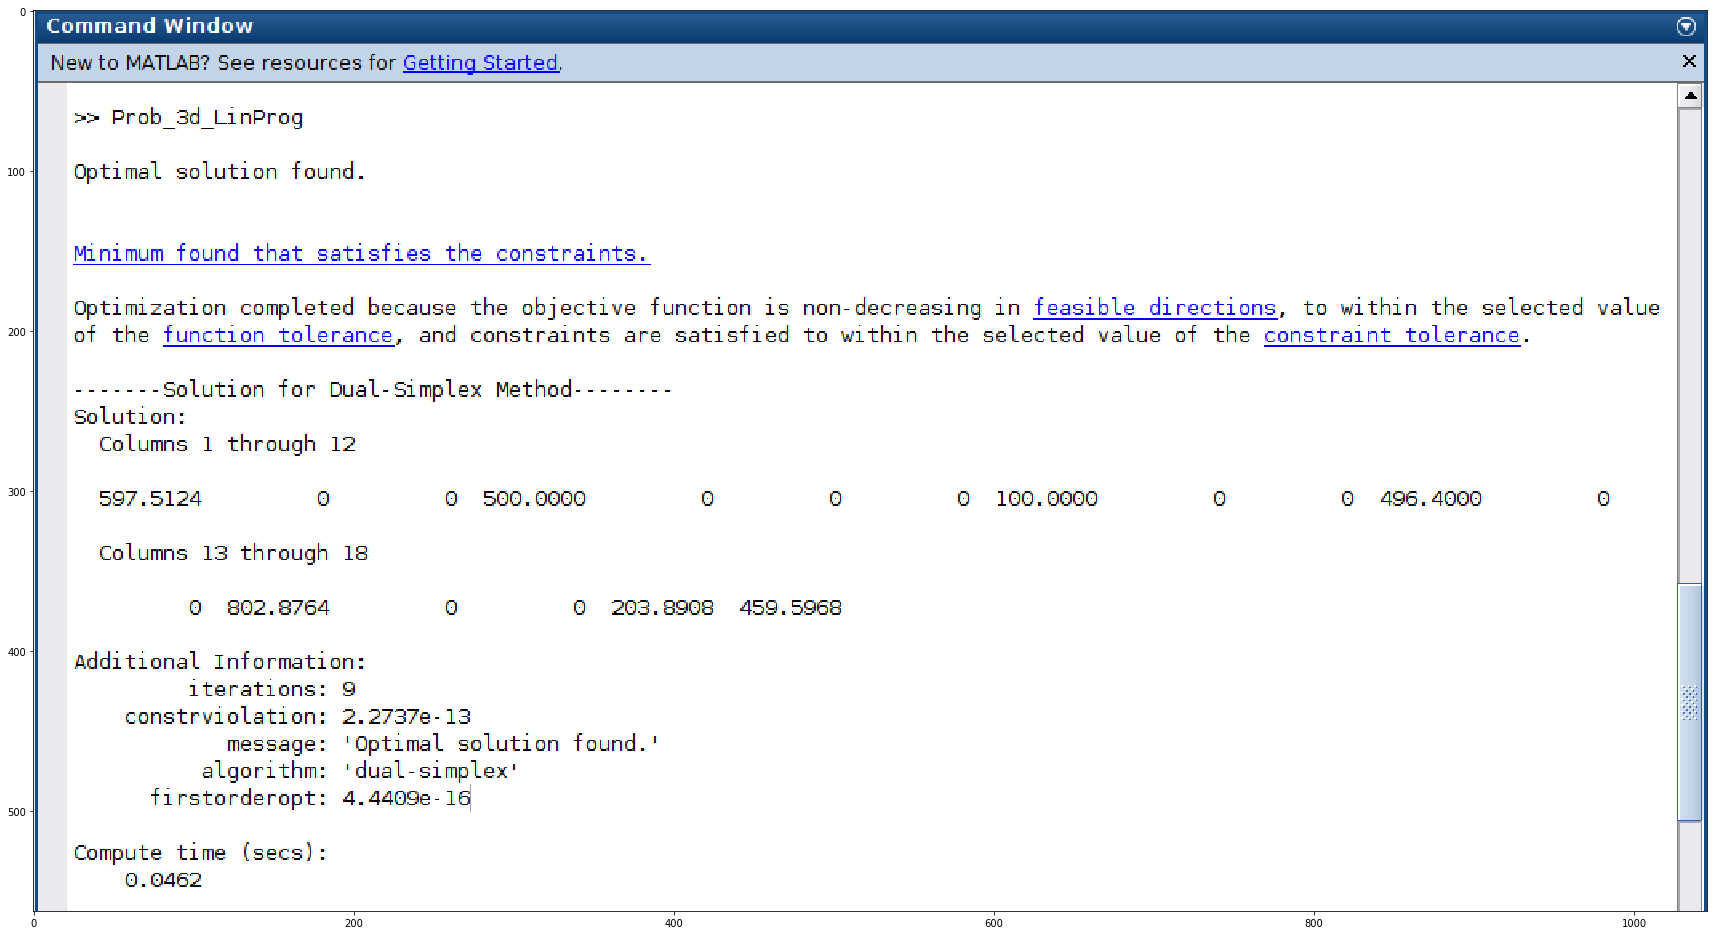

In [18]:
import matplotlib.pyplot as plt
img = plt.imread('prob_3d_matlab_dual_simplex_solns.png')
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.show()

## Verifiying solution with the Interior-Point Method from MATLAB's linprog funtion
### The relevant file is Prob_3d_LinProg.m attached along with this report. Below, we present a snapshot of the solution

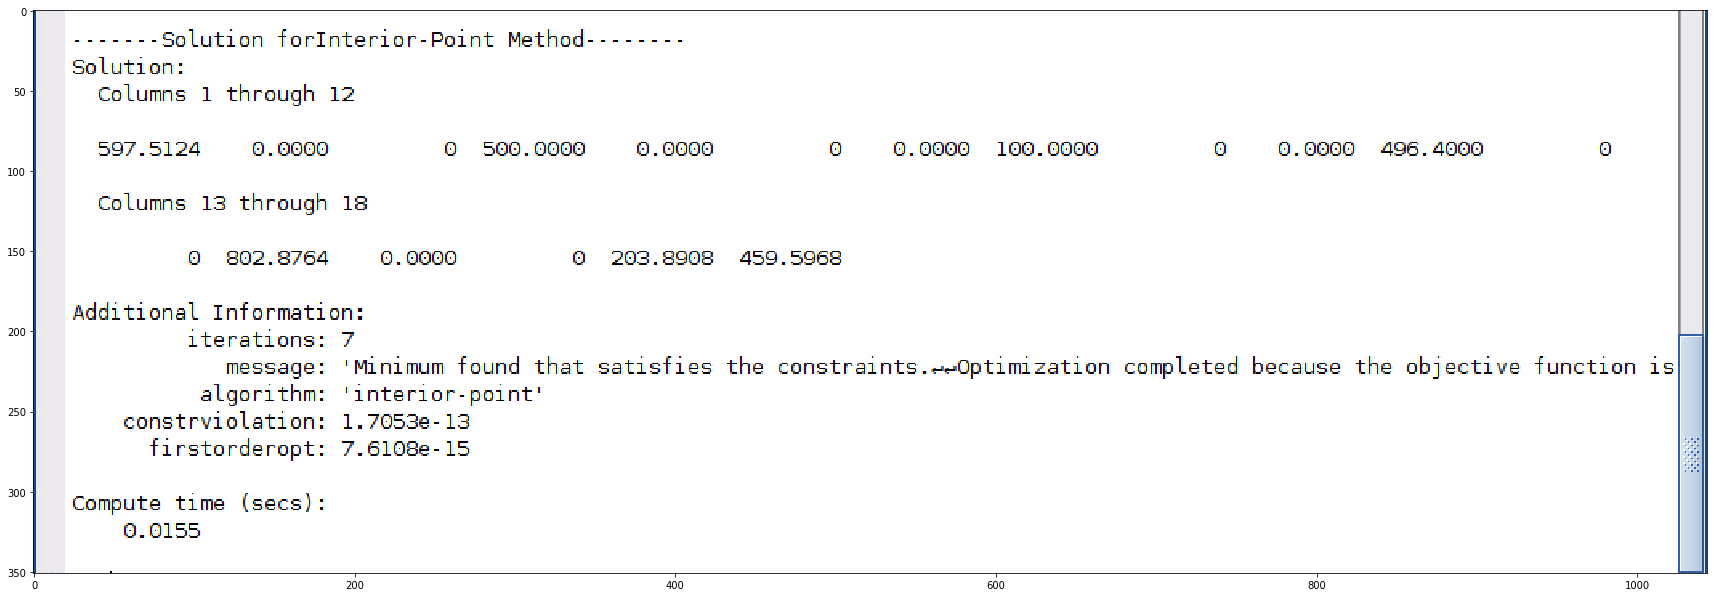

In [17]:
import matplotlib.pyplot as plt
img = plt.imread('prob_3d_matlab_interior_point_soln.png')
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.show()

## We see that the solutions obtained with all these methods are the same as that obtained by our implementation

## Hence, our results are verified

# 3(e)
## The following table shows observations for compute times

| Method. | Compute Time (secs)
| --- | --- |
| Python Scipy- revised simplex | 0.0058 |
| Python Scipy- interior point | 0.0084 | 
| MATLAB linalg- dual simplex | 0.0462
| MATLAB linalg- interior point | 0.0155 | 
| Self implementation - revised simplex | 0.0134 | 
| Self implementation - interior point | ----|

### Observations:

1. Among methods availble in Python, Interior point methods take 8 iterations whereas Revised simplex method is taking 7 No. of iterations.
2. Among MATLAB methons, interior point methods are faster. Also, interior point methods take only 7 iterations to converge whearas the dual simplex converge in 9 iterations. This is expected, since interior point methods involves taking a small number of larger steps towards the solution.
3. MATLAB compute times are larger than those obtained in python for both simplex and interior point methods.
3. Our two phase revised simplex implementation takes 9 iterations in the first phase and 3 iterations for the second phase.(12 iterations in total). Note -- The compute time mentioned for our method is the sum of the times taken by the two phases and does not include the print function times within the for loop. 




### Note:

We also tried implementing the interior point method ourselves. based on algorithm 14.3 in Nocedal and Wright. However, due to a possible logical error, that could not be resolved within the time limit, we were unable to report observations for compute time.

The relavant file is _prob3e_int_point.ipynb.